In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [47]:
data = pd.read_csv('weatherAUS.csv', sep=',')

Kolumny
- Date
- Location
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustDir
- WindGustSpeed
- WindDir9am
- WindDir3pm
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm
- RainToday
- RainTomorrow

In [48]:
data = data.dropna(how='any')
if data.duplicated().any():
    data.drop_duplicates(inplace=True)

print(data.shape)
print(data.isnull().sum())

#delete rows with missing values
data = data.dropna()
print(data.shape)

(56420, 23)
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
(56420, 23)


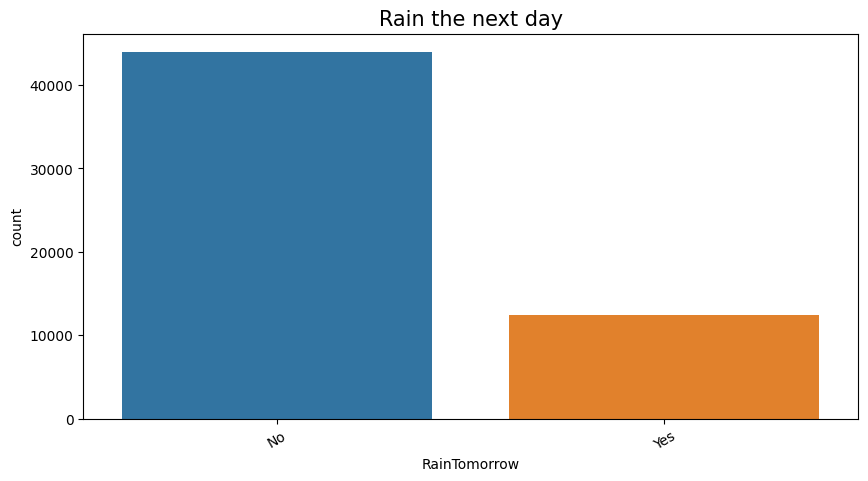

In [49]:
plt.figure(figsize=(10,5))
plt.title('Rain the next day',fontsize=15)
sns.countplot(x=data['RainTomorrow'],data=data)
plt.xticks(rotation=30)
plt.show()

Wykresy pokazują nam ilość nieprawdziwych i prawdziwych newsów, skala jest nieznaczna(prawie 1:3) w obu przypadkach więc baza danych jest wiarygodna

In [50]:
res_data = data.drop(["WindGustDir", "Location", "WindDir9am","WindDir3pm",'Sunshine','Evaporation','Cloud9am', 'Cloud3pm'], axis=1)

for i,row in res_data.iterrows():
    if row['RainToday']=='No':
        #dataframe.at[index,'column-name']='new value'
        res_data.at[i,'RainToday'] = 0
    elif row['RainToday']=='Yes':
        #at index i and column name
        res_data.at[i,'RainToday'] = 1
    #now seperately check other column still need elif cuz there are null variables
    if row['RainTomorrow']=='No':
        res_data.at[i, 'RainTomorrow'] = 0
    elif row['RainTomorrow']=='Yes':
        res_data.at[i, 'RainTomorrow'] = 1

In [51]:
X = res_data.drop(['RainTomorrow', 'Date'], axis=1) 
y = res_data['RainTomorrow'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=278840)

[Text(0.6846364546826351, 0.9848484848484849, 'x[7] <= 69.5\ngini = 0.343\nsamples = 39494\nvalue = [30795, 8699]'),
 Text(0.4513455537963538, 0.9545454545454546, 'x[7] <= 53.5\ngini = 0.242\nsamples = 33251\nvalue = [28561, 4690]'),
 Text(0.24159152225050126, 0.9242424242424242, 'x[3] <= 56.5\ngini = 0.158\nsamples = 22156\nvalue = [20242, 1914]'),
 Text(0.13749307029672173, 0.8939393939393939, 'x[7] <= 42.5\ngini = 0.121\nsamples = 19596\nvalue = [18325, 1271]'),
 Text(0.03965646808682896, 0.8636363636363636, 'x[9] <= 1007.65\ngini = 0.082\nsamples = 11975\nvalue = [11459, 516]'),
 Text(0.012747334413674226, 0.8333333333333334, 'x[7] <= 25.5\ngini = 0.2\nsamples = 1144\nvalue = [1015, 129]'),
 Text(0.006320338277441175, 0.803030303030303, 'x[3] <= 53.0\ngini = 0.092\nsamples = 576\nvalue = [548, 28]'),
 Text(0.004493392373619039, 0.7727272727272727, 'x[8] <= 1013.75\ngini = 0.07\nsamples = 493\nvalue = [475, 18]'),
 Text(0.003536912220582214, 0.7424242424242424, 'x[4] <= 34.0\ngini =

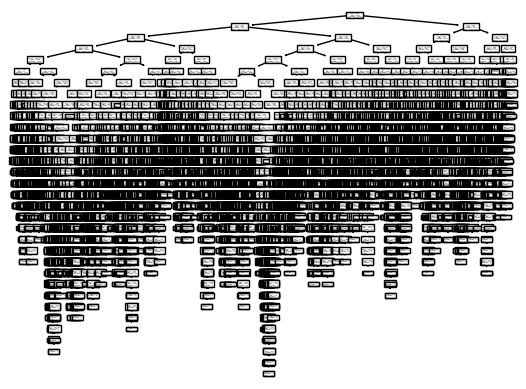

In [52]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

Accuracy of the tree classifier:

In [53]:
clf.score(X_test, y_test)

0.7883729174051755

Confusion matrix: 

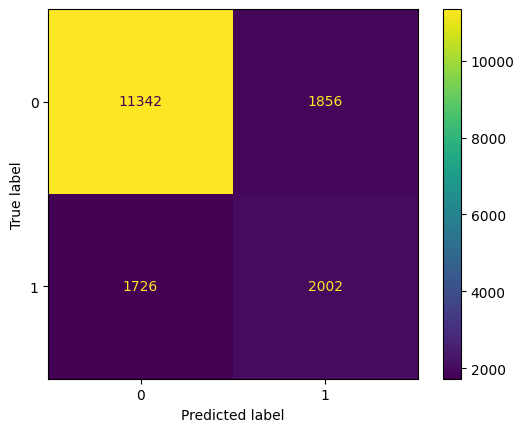

In [54]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Bayes classifier:

In [55]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8111780692425854

Confusion matrix: 

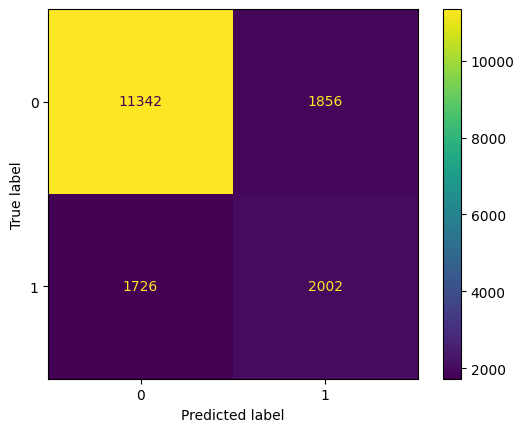

In [56]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

k nearest neighbors classifier with 3 neighbors:

In [57]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8296112489660876

Confusion matrix:

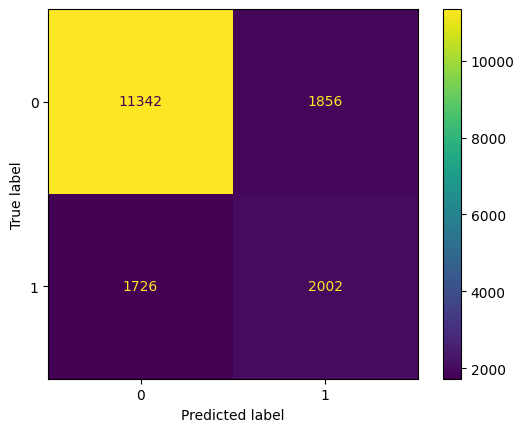

In [58]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()